In [70]:
from math import *
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt


In [71]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 5

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
  './sample-dataset',
  shuffle = True,
  image_size = (IMAGE_SIZE, IMAGE_SIZE),
  batch_size = BATCH_SIZE
)

Found 246 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['lung cancer', 'normal lung']

In [8]:
print(f"Number of batches is {len(dataset)}")

Number of batches is 8


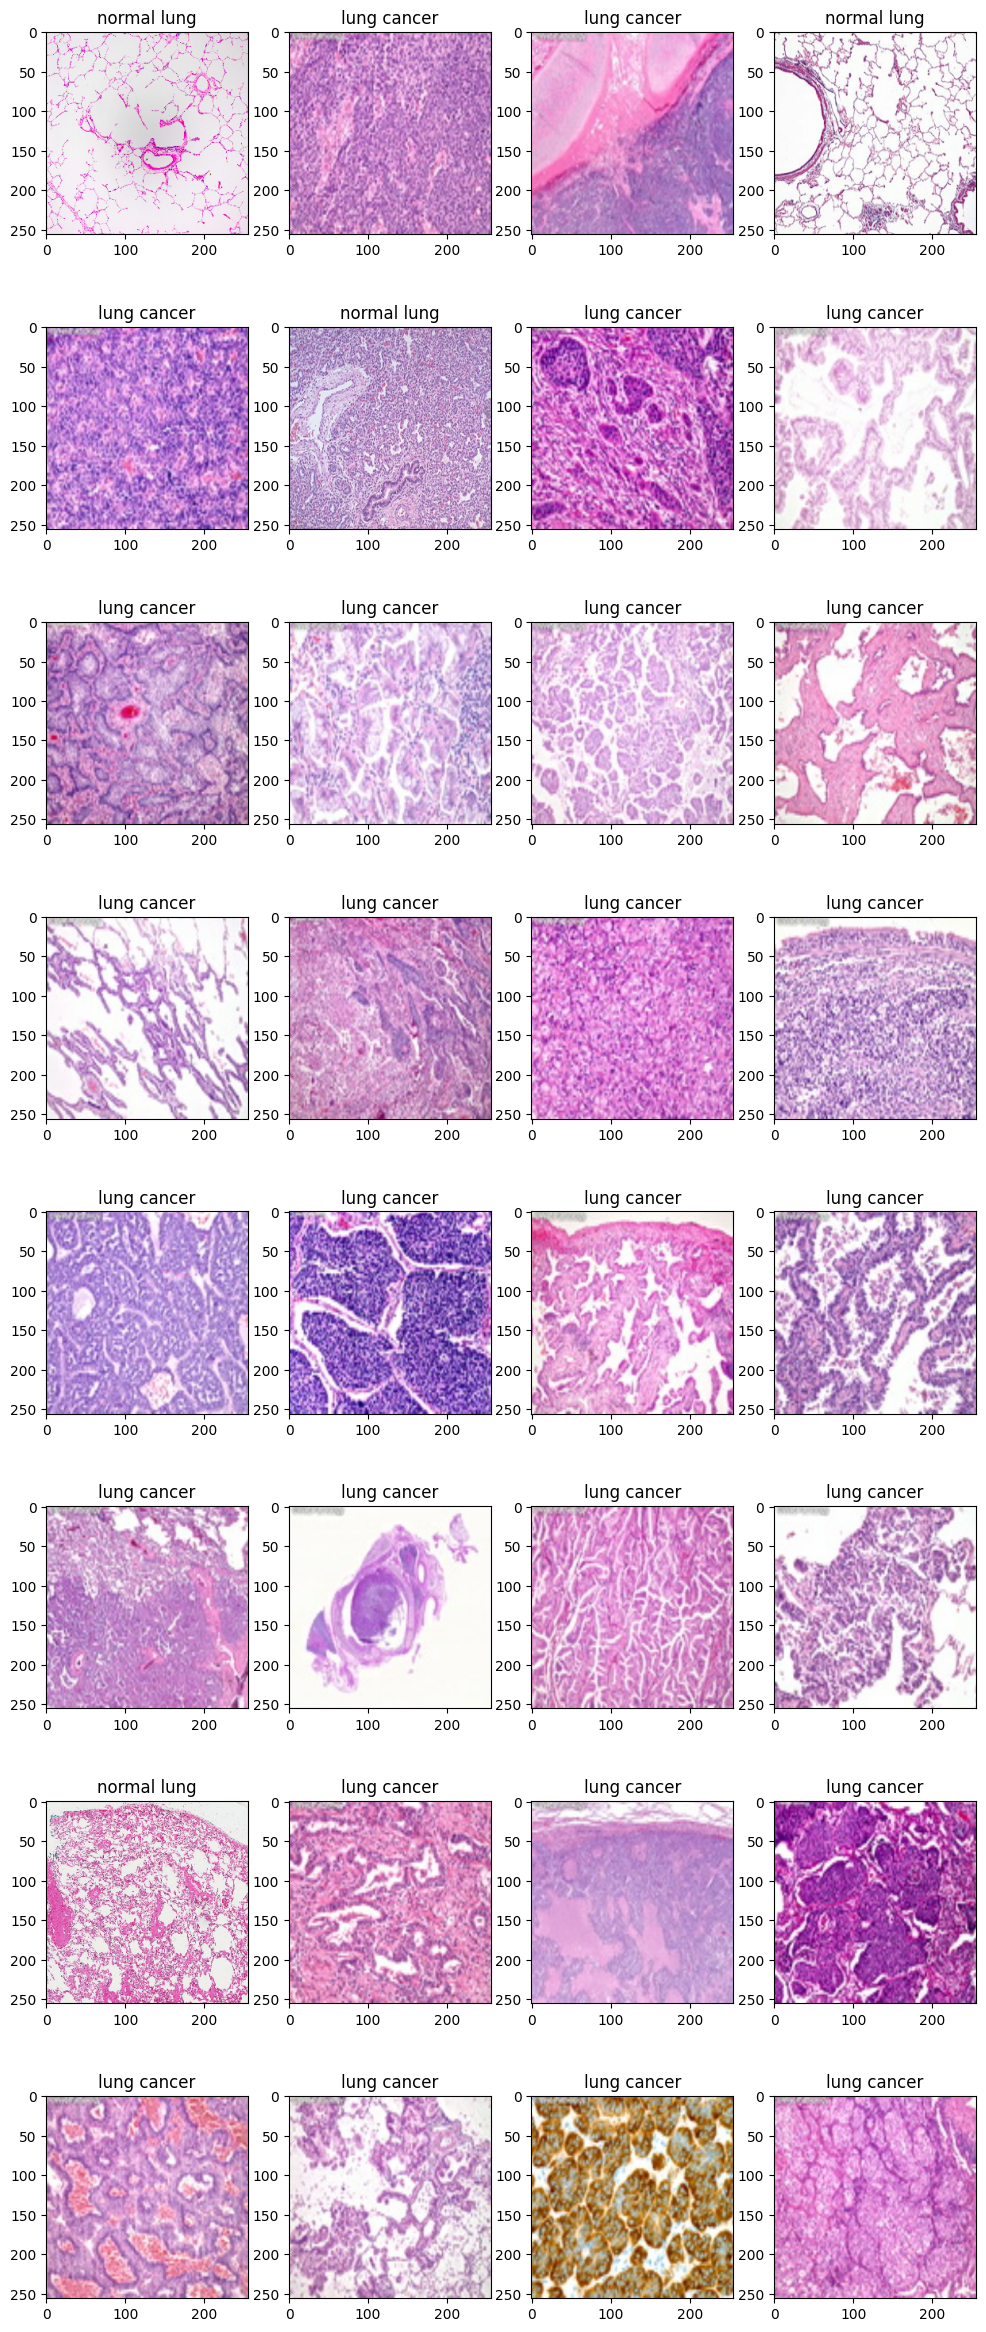

In [68]:
# loop through each batches
# dataset.take(number of batches)

plt.figure(figsize=(12, 30))

for image_batch, label_batch in dataset.take(1):
    for i in range(32):
        plt.subplot(8, 4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        
    # print(image_batch[0].numpy())
    # print(label_batch.numpy())

In [55]:
"""
80% -> training
20% -> 10% validation, 10% test
"""

'\n80% -> training\n20% -> 10% validation, 10% test\n'

In [115]:
train_size = floor(len(dataset) * 0.8 )
train_ds = dataset.take(train_size)


In [116]:
val_size = int((len(dataset) - train_size) / 2)
val_ds = dataset.skip(train_size).take(val_size)

test_size = len(dataset) - train_size - val_size
test_ds = dataset.skip(train_size + val_size).take(test_size)

In [117]:
print(f"Training dataset length : {len(train_ds)}")
print(f"Validation dataset length : {len(val_ds)}")
print(f"Test dataset length : {len(test_ds)}")

Training dataset length : 6
Validation dataset length : 1
Test dataset length : 1


In [118]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [119]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255),
])

In [120]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [121]:
# CNN deep learning model
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation="relu", input_shape = (IMAGE_SIZE, IMAGE_SIZE)),
    
])

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
